<a href="https://colab.research.google.com/github/Sapt-pal/VSD_EdgeAI_on_RISCV/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
dataset = pd.read_csv('studentscores.csv')

In [ ]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values

Y=Mx+C

In [ ]:
class Model():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def predict(self,X):
        return X.dot(self.slope) + self.const

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.slope = np.zeros(X.shape[1])
        self.const = 0
        self.X = X
        self.Y = Y
        for i in range (self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW =- (2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db =- 2 * np.sum(self.Y - Y_pred) / self.m

        self.slope = self.slope - self.learning_rate * dW
        self.const = self.const - self.learning_rate * db
        return self


In [ ]:
model = Model(learning_rate = 0.031, iterations = 100000)
model.fit(X,Y)

In [ ]:
Y_pred = model.predict(X)
print(Y_pred)

[26.92318188 52.3402707  33.76624426 85.57800223 36.69898527 17.14737849
 92.4210646  56.25059205 83.62284155 28.87834256 77.75735951 60.16091341
 46.47478866 34.74382459 13.23705714 89.48832358 26.92318188 21.05769985
 62.11607409 74.8246185  28.87834256 49.40752968 39.63172629 69.9367168
 78.73493985]


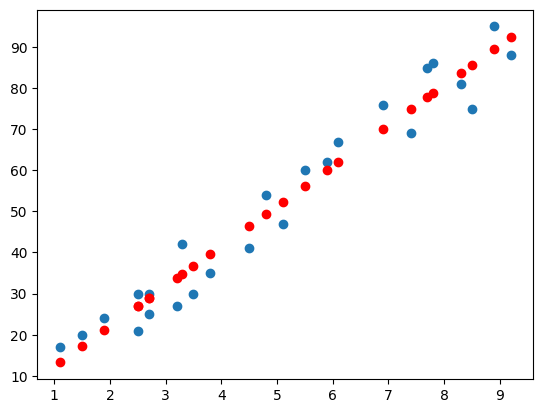

In [ ]:
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.scatter(X, Y_pred, color = "red")
plt.show()


In [ ]:
print(model.slope, model.const)

[9.77580339] 2.483673405373173


In [4]:
dataset = pd.read_csv('startups.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [5]:
print(X)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [9]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(X_test)
print(y_pred)

[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


In [11]:
for i, (pred, actual) in enumerate(zip(y_pred, Y_test)):
    print(f"Sample {i+1}: Predicted = {pred:.2f}, Actual = {actual:.2f}")

Sample 1: Predicted = 103901.90, Actual = 103282.38
Sample 2: Predicted = 132763.06, Actual = 144259.40
Sample 3: Predicted = 133567.90, Actual = 146121.95
Sample 4: Predicted = 72911.79, Actual = 77798.83
Sample 5: Predicted = 179627.93, Actual = 191050.39
Sample 6: Predicted = 115166.65, Actual = 105008.31
Sample 7: Predicted = 67113.58, Actual = 81229.06
Sample 8: Predicted = 98154.81, Actual = 97483.56
Sample 9: Predicted = 114756.12, Actual = 110352.25
Sample 10: Predicted = 169064.01, Actual = 166187.94


In [12]:
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [0.77884104 0.0293919  0.03471025]
Intercept: 42989.00816508669


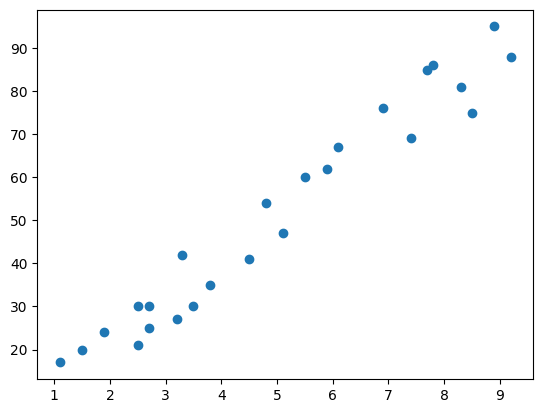

In [17]:
dataset = pd.read_csv('studentscores.csv')
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.show()

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 15)
X_poly = poly.fit_transform(X)
print(X_poly)

[[1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02 6.10351562e+02
  1.52587891e+03 3.81469727e+03 9.53674316e+03 2.38418579e+04
  5.96046448e+04 1.49011612e+05 3.72529030e+05 9.31322575e+05]
 [1.00000000e+00 5.10000000e+00 2.60100000e+01 1.32651000e+02
  6.76520100e+02 3.45025251e+03 1.75962878e+04 8.97410678e+04
  4.57679446e+05 2.33416517e+06 1.19042424e+07 6.07116362e+07
  3.09629344e+08 1.57910966e+09 8.05345925e+09 4.10726422e+10]
 [1.00000000e+00 3.20000000e+00 1.02400000e+01 3.27680000e+01
  1.04857600e+02 3.35544320e+02 1.07374182e+03 3.43597384e+03
  1.09951163e+04 3.51843721e+04 1.12589991e+05 3.60287970e+05
  1.15292150e+06 3.68934881e+06 1.18059162e+07 3.77789319e+07]
 [1.00000000e+00 8.50000000e+00 7.22500000e+01 6.14125000e+02
  5.22006250e+03 4.43705312e+04 3.77149516e+05 3.20577088e+06
  2.72490525e+07 2.31616946e+08 1.96874404e+09 1.67343244e+10
  1.42241757e+11 1.20905494e+12 1.02769670e+13 8.73542191e+13]
 [1.

In [60]:
model = LinearRegression()
model.fit(X_poly, Y)

LinearRegression()

In [61]:
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00 -4.51986780e-04 -1.07452368e-03 -1.32382444e-03
  6.38819192e-04  8.35842320e-03  2.38809996e-02  3.58773370e-02
  1.16136440e-02 -4.08116298e-02  2.27733341e-02 -6.16615420e-03
  9.50266062e-04 -8.53051597e-05  4.16881486e-06 -8.59516107e-08]
19.33841359943151


In [62]:
y_pred = model.predict(X_poly)
print(y_pred)

[25.48883584 51.68835895 32.12111277 77.79841581 34.52512725 19.8990209
 88.16673243 59.16177445 79.28384489 27.37435128 82.63381671 64.87521223
 42.30387484 32.97226035 19.43431419 94.11247957 25.48883584 21.22938152
 66.54460414 77.83754305 27.37435128 46.43939605 36.55762526 70.22547712
 83.46325346]


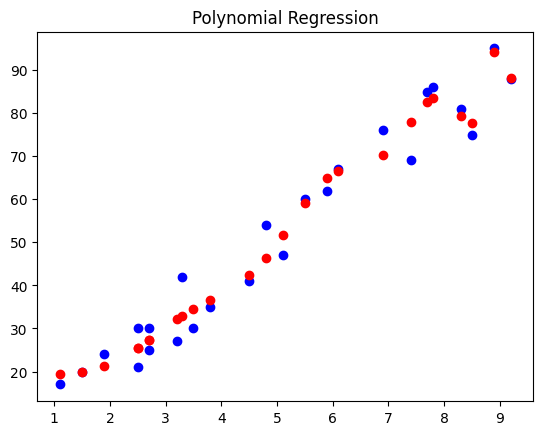

In [63]:
plt.scatter(X, Y, color = 'blue')
plt.scatter(X, y_pred, color='red')
plt.title('Polynomial Regression')
plt.show()